In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [2]:
import collections

from numpy import sqrt


def X(p, n):
    return sqrt(n)/(2*sqrt(p*(1-p))) - sqrt(n*p)/sqrt(1-p)

In [3]:
n = [10, 100, 1000, 10000]
p = [0.001, 0.01, 0.1, 0.25, 0.5]


In [4]:
from scipy.special import erf

Phi = lambda x: erf(x/2**0.5)/2


$n = 10, p = 0.001: 0.0(exact: 2.985030966020993)$
$n = 10, p = 0.01: 0.0(exact: 2.8530662093009997)$
$n = 10, p = 0.1: 0.0006490249663507752(exact: 1.778031)$
$n = 10, p = 0.25: 0.20211670793013647(exact: 1.28704833984375)$
$n = 10, p = 0.5: 0.6826894921370859(exact: 0.2421875)$
$n = 100, p = 0.001: 0.0(exact: 2.85361783674888)$
$n = 100, p = 0.01: 0.0(exact: 1.8150793131365623)$
$n = 100, p = 0.1: 0.0(exact: 0.036882585766283255)$
$n = 100, p = 0.25: 9.052393559749738e-07(exact: 9.142726845289463e-06)$
$n = 100, p = 0.5: 0.6826894921370859(exact: 5.6815663285192386e-14)$
$n = 1000, p = 0.001: 0.0(exact: 1.819137441569485)$
$n = 1000, p = 0.01: 0.0(exact: 0.05915425974651679)$
$n = 1000, p = 0.1: 0.0(exact: 3.3767822481805374e-22)$
$n = 1000, p = 0.25: 0.0(exact: 7.616063874867531e-61)$
$n = 1000, p = 0.5: 0.6826894921370859(exact: 4.0041661899000556e-146)$
$n = 10000, p = 0.001: 0.0(exact: 0.06049020947416612)$
$n = 10000, p = 0.01: 0.0(exact: 3.1549772048026658e-21)$
$n = 10000, p =

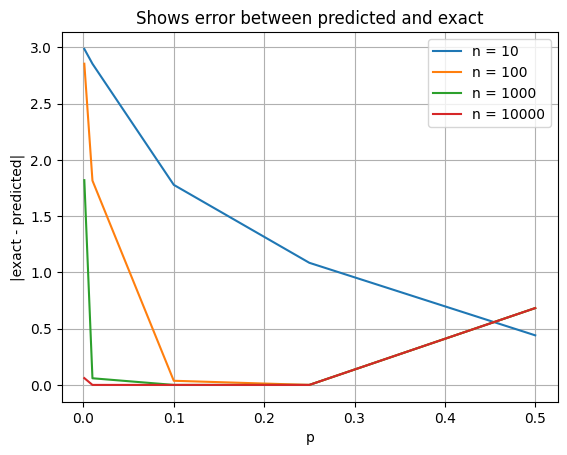

In [5]:

from math import floor, ceil, comb


def exact(p, n):
    left = floor(n/2 - sqrt(n*p*(1-p)))
    right = ceil(n/2 + sqrt(n*p*(1-p)))

    acc = 0
    for i in range(left, right+1):
        acc += comb(i, n) * pow(p, i) + pow(1-p, n-i)

    return acc


fig, ax = plt.subplots()
for ni in n:

    errors = []
    for pi in p:
        k1 = X(pi, ni) - 1
        k2 = X(pi, ni) + 1

        phi1 = Phi(k1)
        phi2 = Phi(k2)

        predicted = phi2 - phi1
        exact_v = exact(pi, ni)

        errors.append(abs(exact_v - predicted))

        print("$n = {}, p = {}: {}(exact: {})$".format(ni, pi, predicted, exact_v))

    ax.plot(p, errors, label = "n = {}".format(ni))

ax.set(xlabel='p', ylabel='|exact - predicted|',
       title='Shows error between predicted and exact')
ax.grid()
ax.legend()

